# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- **TPU(Tensor Processing Unit) 지원**
  - **TPU는 GPU보다 전력을 적게 소모, 경제적**
  
  - **일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤**

<br>

<br>

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

<br>

<br>

## 텐서플로우 시작하기

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
print(tf.__version__)

2.12.0


<br>

### 텐서(Tensor)의 객체
- **타입(Type)** : `string`, `float32`, `float16`, `int32`, `int8` 등

- **형상(Shape)** : 0, 1, 2차원 등의 데이터 차원 

- **축(Rank)** : 차원의 개수

<br>

### 텐서의 차원과 연산

<br>

#### `tensorflow.constant()` : `tensorflow 상수`
#### `tensorflow.rank()` : 데이터의 차원 개수

In [3]:
a = tf.constant(2)
print(tf.rank(a))
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [5]:
b = tf.constant([2, 3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [7]:
c = tf.constant([[2, 3], [4, 5]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


- 문자열 텐서 생성 (dtype = string)

In [8]:
d = tf.constant('Hello')
print(tf.rank(d))
print(d)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(b'Hello', shape=(), dtype=string)


<br>

### 난수 생성

<br>

#### `tensorflow.random.uniform(shape, minval, maxval)`
- $U($ `minval` $, $ `maxval`$)$을 따르는 `shape`차원의 텐서 생성 

In [12]:
rand = tf.random.uniform(shape=[1], minval=0, maxval=1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.25597024], shape=(1,), dtype=float32)


<br>

#### `tensorflow.random.normal(shape, mean, stddev)`
- $N($ `mean`, `stddev` $)$를 따르는 `shape`차원의 텐서 생성

In [14]:
rand2 = tf.random.normal(shape=[1, 2], mean=0, stddev=1)
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[1.6199247 1.2321527]], shape=(1, 2), dtype=float32)


In [15]:
rand3 = tf.random.normal(shape=[3, 2], mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[ 1.9164135  1.0501547]
 [-1.9181337  1.0023453]
 [ 1.4176276 -0.4641555]], shape=(3, 2), dtype=float32)


<br>

### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [16]:
a = tf.constant(3)
b = tf.constant(2)

In [17]:
print(tf.add(a, b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [20]:
print(tf.subtract(a, b))
print(a - b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [22]:
print(tf.multiply(a, b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


<br>

### 텐서 플로우 ↔ 넘파이

<br>

#### `numpy()` : `numpy`변환

In [23]:
c = tf.add(a, b).numpy()
print(type(c))

<class 'numpy.int32'>


<br>

#### `tf.convet_to_tensor()` : 텐서 변환

In [25]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


<br>

### 넘파이처럼 사용하기


In [26]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [27]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [28]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [30]:
print(t + 10)

tf.Tensor(
[[11. 12. 13.]
 [14. 15. 16.]], shape=(2, 3), dtype=float32)


<br>

- `tf.square()` : 제곱

In [33]:
print(tf.square(t))

tf.Tensor(
[[ 1.  4.  9.]
 [16. 25. 36.]], shape=(2, 3), dtype=float32)


<br>

- 텐서곱

In [34]:
print(t @ tf.transpose(t))

tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float32)


### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

<br>

#### `tf.cast()` : 타입변환

In [35]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


<br>

- **서로 다른 타입끼리 연산 불가**

In [42]:
tf.constant(2., dtype=tf.float32) + tf.constant(30., dtype=tf.float64)

InvalidArgumentError: ignored

In [41]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)

print(t2 + tf.cast(t, tf.float32))

tf.Tensor(34.0, shape=(), dtype=float32)


<br>

### AutoGraph (오토그래프)

- **Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행**

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [43]:
import timeit

<br>

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

  - 그래프로 변환하여 사용 -> GPU 연산 가능

- **파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능**


- 원본 함수가 필요하다면 `(tf.function).python_function()`

<br>

#### `@tf.function`
- 결과값을 텐서형태로

In [44]:
@tf.function
def my_function(x):
  return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


- `@tf.function` 미사용 시, **input값이 텐서인 경우에만 결과값을 텐서로**

In [45]:
def my_function_(x):
  return x**2 - 10*x + 3

print(my_function_(2))
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


<br>

#### `tf.function(함수)` : 파이썬 함수를 tensorflow 함수로 변경

In [46]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


<br>

#### `tensorflow함수.python_function()` : tensorflow함수를 파이썬 함수로 변경

In [49]:
tf_my_func.python_function(2)

-13

<br>

In [51]:
def function_to_get_faster(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1., 2.]])
y1 = tf.constant([[2.], [3.]])
b1 = tf.constant(4.)

a_function_that_uses_a_graph(x1, y1, b1).numpy()

array([[12.]], dtype=float32)

<br>

In [54]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

@tf.function
def outer_function(x):
  y = tf.constant([[2.], [3.]])
  b = tf.constant(4.)
  return inner_function(x, y, b)

outer_function(tf.constant([[1., 2.]])).numpy()

array([[12.]], dtype=float32)

<br>

#### `tensorflow.autograph.to_code(파이썬 함수)` : 텐서플로우가 `tf.function`으로 변환한 코드

In [60]:
print(tf.autograph.to_code(my_function.python_function), end="\n\n")
print(tf.autograph.to_code(tf_my_func.python_function), end="\n\n")
print(tf.autograph.to_code(outer_function.python_function), end="\n\n")

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.ld(x) ** 2 - 10 * ag__.ld(x) + 3
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)


def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.ld(x) ** 2 - 10 * ag__.ld(x) + 3
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)


def tf__outer_func

<br>


#### 속도 향상
- 오토그래프를 사용 (tensorflow 함수 변환) 하는 것이 빠름

In [65]:
class SequentialModel(tf.keras.Model):
  
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
    self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

In [66]:
input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager Time :", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph Time :", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager Time : 26.212387693999972
Graph Time : 7.790181602999837


<br>

### 변수생성

<br>

#### `tf.Variable()` : tensorflow 변수생성

- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [67]:
X = tf.Variable(20.)

print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


<br>

### Autograd (자동 미분)

#### `tf.GradientTape(persistent=False)`
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
- **`persistent` : (`True` = 지속사용 / `False` = 일회성 사용)**
  - **사용이 끝났다면, `del`을 통해서 삭제**
- **변수가 포함된 연산만 기록**

In [68]:
x = tf.Variable(3.)

with tf.GradientTape() as tape:
  y = x**2

In [69]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

<br>

In [70]:
x = tf.Variable(2.)
y = tf.Variable(3.)

with tf.GradientTape() as tape:
  y_sq = y**2
  z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx', grad['x'])
print('dz/dy', grad['y'])

dz/dx tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy None


<br>

In [71]:
weights = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ weights + biases
  loss = tf.reduce_mean(y**2)

In [72]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [73]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


<br>

In [74]:
weights2 = tf.Variable(tf.random.normal((3, 2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[4., 5., 6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [75]:
del tape

<br>

<br>


## 간단한 신경망 구조 

<br>

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [104]:
def sigmoid(x):
  return (1 / (1+np.exp(-x)))

def Neuron(x, W, bias=0):
  z = x * W + bias
  return(sigmoid(z))

In [105]:
x = tf.random.normal((1, 2), 0, 1)
W = tf.random.normal((1, 2), 0, 1)

print("x.shape: ", x.shape)
print("W.shape: ", W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape:  (1, 2)
W.shape:  (1, 2)
tf.Tensor([[-0.30910227 -1.53338   ]], shape=(1, 2), dtype=float32)
tf.Tensor([[-0.135815    0.08075409]], shape=(1, 2), dtype=float32)
[[0.51049364 0.4690828 ]]


<br>

### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [106]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
lr = 0.1

print(Neuron(x, W))
print('y:', y)

[0.7242702]
y: 0


In [107]:
for i in range(1000):
  output = Neuron(x, W)
  error = y - output
  W = W + x * lr * error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[-0.11899576]	[0.11899576]
200	[-0.05671674]	[0.05671674]
300	[-0.03676638]	[0.03676638]
400	[-0.02710098]	[0.02710098]
500	[-0.02142701]	[0.02142701]
600	[-0.01770384]	[0.01770384]
700	[-0.0150762]	[0.0150762]
800	[-0.01312405]	[0.01312405]
900	[-0.01161729]	[0.01161729]
1000	[-0.01041948]	[0.01041948]


<br>

#### `tensorflow.matmul(행렬1, 행렬2, transpose_a=False, transpose_b=False, ...)` : 행렬1과 행렬2간의 행렬곱
- `transpose_a` : **행렬1을 transpose하여 곱함**

In [110]:
def Neuron2(x, W, bias=0):
  z = tf.matmul(x, W, transpose_b=True)
  return(sigmoid(z))

In [111]:
x = tf.random.normal((1, 3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1, 3), 0, 1)

print(Neuron2(x, W))
print("y:", y)

[[0.2501016]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [113]:
for i in range(1000):
  output = Neuron2(x, W)
  error = y - output
  W = W + x*lr*error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.02220809]]	[[0.9777919]]
200	[[0.01079112]]	[[0.9892089]]
300	[[0.00711495]]	[[0.99288505]]
400	[[0.0053044]]	[[0.9946956]]
500	[[0.00422746]]	[[0.99577254]]
600	[[0.00351357]]	[[0.9964864]]
700	[[0.00300586]]	[[0.99699414]]
800	[[0.00262618]]	[[0.9973738]]
900	[[0.00233155]]	[[0.99766845]]
1000	[[0.00209641]]	[[0.9979036]]


<br>

In [114]:
x = tf.random.normal((1, 3), 0, 1)
weights = tf.random.normal((1, 3), 0, 1)
bias = tf.zeros((1, 1))

y = tf.ones((1, ))

print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[ 1.0453404  -0.20479923 -1.2998639 ]]
weights	: [[ 0.8877617   0.50752705 -2.3649933 ]]
bias	: [[0.]]


In [115]:
for i in range(1000):
  output = Neuron2(x, weights, bias)
  error = y - output
  weights = weights + x*lr*error
  bias = bias + 1*lr*error

  if i % 100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.01283795]]	[[0.98716205]]
200	[[0.00944549]]	[[0.9905545]]
300	[[0.00746769]]	[[0.9925323]]
400	[[0.00617331]]	[[0.9938267]]
500	[[0.00526053]]	[[0.9947395]]
600	[[0.00458264]]	[[0.99541736]]
700	[[0.0040592]]	[[0.9959408]]
800	[[0.00364298]]	[[0.996357]]
900	[[0.003304]]	[[0.996696]]
1000	[[0.00302267]]	[[0.9969773]]


In [116]:
print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[ 1.0453404  -0.20479923 -1.2998639 ]]
weights	: [[ 1.5914328  0.3696667 -3.239995 ]]
bias	: [[0.6731506]]


<br>

### AND Gate

In [122]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X[j] * W) + b_x + b)
    error = Y[j][0] - output
    W = W + X[j] * lr * error
    b = b + b_x  * lr * error
    error_sum += error

  if i% 200 == 0:
    print("Epoch {:.4f}\tError Sum {}".format(i, error_sum))

print("\n가중치\t [{} {}]".format(W[0], W[1]))
print("편향\t: {}".format(b))

Epoch 0.0000	Error Sum [-1.8182061]
Epoch 200.0000	Error Sum [-0.11550841]
Epoch 400.0000	Error Sum [-0.06749784]
Epoch 600.0000	Error Sum [-0.04758632]
Epoch 800.0000	Error Sum [-0.03663728]
Epoch 1000.0000	Error Sum [-0.02972711]
Epoch 1200.0000	Error Sum [-0.02498174]
Epoch 1400.0000	Error Sum [-0.02152457]
Epoch 1600.0000	Error Sum [-0.01889951]
Epoch 1800.0000	Error Sum [-0.0168366]

가중치	 [6.95913553237915 6.9622955322265625]
편향	: [-11.617854]


In [123]:
for i in range(4):
  print("X: {} Y: {} Output: {}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X: [1 1] Y: [1] Output: [0.9091728]
X: [1 0] Y: [0] Output: [0.0093896]
X: [0 1] Y: [0] Output: [0.00941904]
X: [0 0] Y: [0] Output: [9.003807e-06]


<br>

### OR Gate

In [124]:
X2 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y2 = np.array([[1], [1], [1], [0]])

W2 = tf.random.normal([2], 0, 1)
b2 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X2[j] * W2) + b_x + b2)
    error = Y2[j][0] - output
    W2 = W2 + X2[j] * lr * error
    b2 = b2 + b_x  * lr * error
    error_sum += error

  if i% 200 == 0:
    print("Epoch {:.4f}\tError Sum {}".format(i, error_sum))

print("\n가중치\t [{} {}]".format(W2[0], W2[1]))
print("편향\t: {}".format(b2))

Epoch 0.0000	Error Sum [0.23671478]
Epoch 200.0000	Error Sum [-0.05021745]
Epoch 400.0000	Error Sum [-0.02608612]
Epoch 600.0000	Error Sum [-0.01749585]
Epoch 800.0000	Error Sum [-0.01311423]
Epoch 1000.0000	Error Sum [-0.01046812]
Epoch 1200.0000	Error Sum [-0.0087014]
Epoch 1400.0000	Error Sum [-0.00744019]
Epoch 1600.0000	Error Sum [-0.00649495]
Epoch 1800.0000	Error Sum [-0.00576207]

가중치	 [8.20468521118164 8.203108787536621]
편향	: [-4.6363764]


In [134]:
for i in range(4):
  print("X2: {} Y2: {} Output: {}".format(X2[i], Y2[i], sigmoid(np.sum(X2[i] * W2) + b2)))

X2: [1 1] Y2: [1] Output: [0.99999225]
X2: [1 0] Y2: [1] Output: [0.9725701]
X2: [0 1] Y2: [1] Output: [0.9725281]
X2: [0 0] Y2: [0] Output: [0.00959971]


<br>

### XOR Gate

- 단일 레이어로는 학습이 되지 않음을 확인

In [131]:
X3 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y3 = np.array([[0], [1], [1], [0]])

W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
    error = Y3[j][0] - output
    W3 = W3 + X3[j] * lr * error
    b3 = b3 + b_x  * lr * error
    error_sum += error

  if i% 200 == 0:
    print("Epoch {:.4f}\tError Sum {}".format(i, error_sum))

print("\n가중치\t [{} {}]".format(W3[0], W3[1]))
print("편향\t: {}".format(b3))

Epoch 0.0000	Error Sum [-1.3420624]
Epoch 200.0000	Error Sum [-0.00067788]
Epoch 400.0000	Error Sum [-2.759695e-05]
Epoch 600.0000	Error Sum [-1.3113022e-06]
Epoch 800.0000	Error Sum [-1.013279e-06]
Epoch 1000.0000	Error Sum [-1.013279e-06]
Epoch 1200.0000	Error Sum [-1.013279e-06]
Epoch 1400.0000	Error Sum [-1.013279e-06]
Epoch 1600.0000	Error Sum [-1.013279e-06]
Epoch 1800.0000	Error Sum [-1.013279e-06]

가중치	 [0.051279664039611816 -2.078711986541748e-06]
편향	: [-0.9999969]


In [133]:
for i in range(4):
  print("X3: {} Y3: {} Output: {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i] * W3) + b3)))

X3: [1 1] Y3: [0] Output: [0.27914244]
X3: [1 0] Y3: [1] Output: [0.2791429]
X3: [0 1] Y3: [1] Output: [0.2689416]
X3: [0 0] Y3: [0] Output: [0.26894203]


<br>

- tensorflow를 통한 2층 모형 생성

In [141]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2, )),
                    Dense(units=1, activation='sigmoid',)])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [142]:
history = model.fit(X4, Y4, epochs=3000, batch_size=1, verbose=False)

In [143]:
model.predict(X4)

1/1 [==============================] - 0s 48ms/step


array([[0.10318714],
       [0.9018927 ],
       [0.9023774 ],
       [0.07586034]], dtype=float32)

<br>

<br>

## 시각화 사용

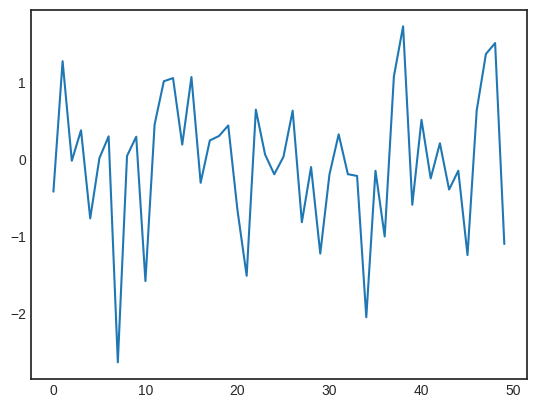

In [144]:
import matplotlib.pyplot as plt

x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x, y)
plt.show()

<br>

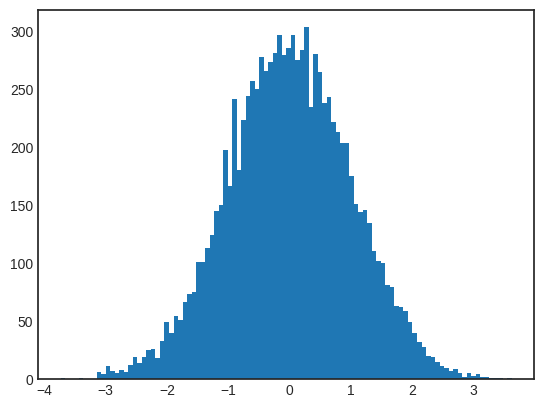

In [148]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

<br>

### XOR Gate의 'LOSS' 시각화


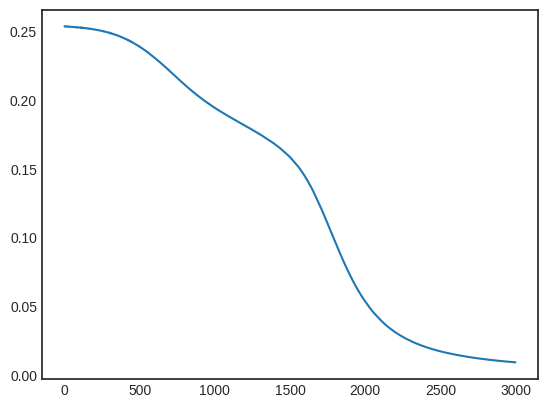

In [149]:
plt.plot(history.history['loss'])
plt.show()